## 第7章支持向量机-习题

### 习题7.1
&emsp;&emsp;比较感知机的对偶形式与线性可分支持向景机的对偶形式。

**解答：**  
**感知机算法的原始形式：**  
给定一个训练数据集$$T=\{(x_1,y_1),(x_2,y_2),\cdots,(x_N,y_N)\}$$其中，$x_i \in \mathcal{X} = R^n, y_i \in \mathcal{Y}=\{-1,1\}, i=1,2,\cdots,N$，求参数$w,b$，使其为以下损失函数极小化问题的解：$$\min_{w,b} L(w,b)=-\sum_{x_i \in M} y_i(w \cdot x_i + b)$$其中M为误分类点的集合。  
上式等价于：$$\min_{w,b} L(w,b)=\sum_{i=1}^N (-y_i(w \cdot x_i + b))_+$$

----

**补充：** 合页损失函数$$L(y(w \cdot x + b)) = [1-y(w \cdot x + b)]_+$$下标“+”表示以下取正数的函数。$$[z]_+ = \left\{\begin{array}{ll} z, & z>0 \\
0, & z \leqslant 0 
\end{array} \right.$$当样本点$(x_i,y_i)$被正确分类且函数间隔（确信度）$y_i(w \cdot x_i + b)$大于1时，损失是0，否则损失是$1-y_i(w \cdot x_i + b)$。

----

**感知机算法的对偶形式：**  
$w,b$表示为$\langle x_i,y_i \rangle$的线性组合的形式，求其系数（线性组合的系数）$\displaystyle w=\sum_{i=1}^N \alpha_i y_i x_i, b=\sum_{i=1}^N \alpha_i y_i$，满足：$$
\min_{w,b} L(w,b) = \min_{\alpha_i} L(\alpha_i) = \sum_{i=1}^N (-y_i (\sum_{j=1}^N \alpha_j y_j x_j \cdot x_i + \sum_{j=1}^N \alpha_j y_j))_+$$  

**线性可分支持向量机的原始问题：**  
$$\begin{array}{cl} 
\displaystyle \min_{w,b} & \displaystyle \frac{1}{2} \|w\|^2 \\
\text{s.t.} & y_i(w \cdot x_i + b) -1 \geqslant 0, i=1,2,\cdots,N
\end{array}$$  

**线性可分支持向量机的对偶问题：**  
$$\begin{array}{cl} 
\displaystyle \max_{\alpha} & \displaystyle -\frac{1}{2} \sum_{i=1}^N \sum_{j=1}^N \alpha_i \alpha_j y_i y_j (x_i \cdot x_j) + \sum_{i=1}^N 
alpha_i \\
\text{s.t.} & \displaystyle \sum_{i=1}^N \alpha_i y+i = 0 \\
& \alpha \geqslant 0, i=1,2,\cdots,N
\end{array}$$根据书上**定理7.2**，可得$\displaystyle w^*=\sum_{i=1}^N \alpha_i^* y_j x_i, b^*=y_i-\sum_{i=1}^N \alpha^* y_i (x_i \cdot x_j)$，可以看出$w,b$实质上也是将其表示为$\langle x_i, x_j\rangle$的线性组合形式。

### 习题7.2

&emsp;&emsp;已知正例点$x_1=(1,2)^T,x_2=(2,3)^T,x_3=(3,3)^T$，负例点$x_4=(2,1)^T,x_5=(3,2)^T$，试求最大间隔分离平面和分类决策函数，并在图中挂出分离超平面、间隔边界及支持向量。  

**解答：**

In [1]:
from sklearn.svm import SVC

# 加载数据
X = [[1, 2], [2, 3], [3, 3], [2, 1], [3, 2]]
y = [1, 1, 1, -1, -1]

# 训练SVM模型
clf = SVC(kernel='linear', C=10000)
clf.fit(X, y)

print("w =", clf.coef_)
print("b =", clf.intercept_)
print("support vectors =", clf.support_vectors_)

w = [[-1.  2.]]
b = [-2.]
support vectors = [[3. 2.]
 [1. 2.]
 [3. 3.]]


**最大间隔分离超平面：**$-x^{(1)}+2x^{(2)}-2=0$  
**分类决策函数：**$f(x)=\text{sign}(-x^{(1)}+2x^{(2)}-2)$  
**支持向量：**$x_1=(3,2)^T,x_2=(1,2)^T, x_3=(3,3)^T$  

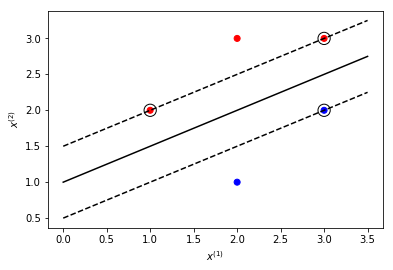

In [2]:
import matplotlib.pyplot as plt
import numpy as np

# 绘制数据点
color_seq = ['red' if v==1 else 'blue' for v in y]
plt.scatter([i[0] for i in X], [i[1] for i in X], c=color_seq)
# 得到x轴的所有点
xaxis = np.linspace(0, 3.5)
w = clf.coef_[0]
# 计算斜率
a = -w[0] / w[1]
# 得到分离超平面
y_sep = a * xaxis - (clf.intercept_[0]) / w[1]
# 下边界超平面
b = clf.support_vectors_[0]
yy_down = a * xaxis + (b[1] - a * b[0])
# 上边界超平面
b = clf.support_vectors_[-1]
yy_up = a * xaxis + (b[1] - a * b[0])
# 绘制超平面
plt.plot(xaxis, y_sep, 'k-')
plt.plot(xaxis, yy_down, 'k--')
plt.plot(xaxis, yy_up, 'k--')
# 绘制支持向量
plt.xlabel('$x^{(1)}$')
plt.ylabel('$x^{(2)}$')
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=150, facecolors='none', edgecolors='k')
plt.show()

### 习题7.3

&emsp;&emsp;线性支持向量机还可以定义为以下形式：$$\begin{array}{cl} 
\displaystyle \min_{w,b,\xi} & \displaystyle \frac{1}{2} \|w\|^2 + C \sum_{i=1}^N \xi_i^2 \\
\text{s.t.} & y_i(w \cdot x_i + b) \geqslant 1 - \xi_i, i=1,2,\cdots, N \\
& \xi_i \geqslant 0, i=1,2,\cdots, N
\end{array}$$试求其对偶形式。

**解答：**  
根据支持向量机的对偶算法，得到对偶形式，由于不能消去变量$\xi_i$的部分，所以拉格朗日因子也包含$\beta_i$。  
拉格朗日函数为：$$L(w,b,\xi, \alpha, \beta) = \frac{1}{2} \|w\|^2 + C \sum_{i=1}^N \xi_i^2 + \sum_{i=1}^N \alpha_i - \sum_{i=1}^N \alpha_i \xi_i - \sum_{i=1}^N \alpha_i y_i (w \cdot x_i + b) - \sum_{i=1}^N \beta_i \xi_i$$  
分别求$w,b,\xi$的偏导数：$$\left \{ \begin{array}{l}
\displaystyle \nabla_w L  = w - \sum_{i=1}^N \alpha_i y_i x_i = 0 \\ 
\displaystyle \nabla_b L  =  -\sum_{i=1}^N \alpha_i y_i = 0 \\
\nabla_{\xi} L  = 2C \xi_i - \alpha_i - \beta_i = 0 
\end{array} \right.$$化简可得：$$\left \{ \begin{array}{l}
\displaystyle w = \sum_{i=1}^N \alpha_i y_i x_i = 0 \\ 
\displaystyle \sum_{i=1}^N \alpha_i y_i = 0 \\
2C \xi_i - \alpha_i - \beta_i = 0 
\end{array} \right.$$  
可解得：$$
L=-\frac{1}{2} \sum_{i=1}^N \sum_{j=1}^N \alpha_i \alpha_j y_i y_j (x_i \cdot x_{j})+\sum_{i=1}^N \alpha_i-\frac{1}{4C}\sum_{i=1}^N(\alpha_i+\beta_i)^2$$

### 习题7.4

&emsp;&emsp;证明内积的正整数幂函数：$$K(x,z)=(x\cdot z)^p$$是正定核函数，这里$p$是正整数，$ x,z\in R^n$。

**解答：**  
根据书中第121页定理7.5可知，如果需要证明$K(x,z)$是正定核函数，即证明$K(x,z)$对应的Gram矩阵$K=\left[ K(x_i,x_j) \right]_{m \times m}$是半正定矩阵。  
对任意$c_1,c_2,\cdots,c_m \in \mathbf{R}$，有$$\begin{aligned} 
\sum_{i,j=1}^m c_i c_j K(x_i,x_j) 
&= \sum_{i,j=1}^m c_i c_j (x_i \cdot x_j)^p \\
&= \left(\sum_{i=1}^m c_i x_i \right)\left(\sum_{j=1}^m c_i x_j \right)(x_i \cdot x_j)^{p-1} \\
&= \Bigg\|\left( \sum_{i=1}^m c_i x_i \right)\Bigg\|^2 (x_i \cdot x_j)^{p-1}
\end{aligned}$$
$\because p$是正整数，$p \geqslant 1$  
$\therefore p-1 \geqslant 0 \Rightarrow (x_i \cdot x_j)^{p-1} \geqslant 0$  
故$\displaystyle \sum_{i,j=1}^m c_i c_j K(x_i,x_j) \geqslant 0$，即Gram矩阵是半正定矩阵。  
根据定理7.5，可得$K(x,z)$是正定核函数，得证。